In [113]:
#Linear Regression HW 5

In [114]:
rm(list = ls()) #Remove prior variables

In [ ]:
#Read in data

In [115]:
data <- read.table('uscrime.txt', stringsAsFactors = FALSE, header = TRUE)

In [ ]:
#Check data is loaded

In [117]:
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.0846,26.2,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.0296,25.3,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.0834,24.3,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.0158,29.9,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.0414,21.3,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.0342,21.0,682


In [118]:
#Scale the data for the process of determining factors to use. (Run again without scale before predicting datapoint)

In [192]:
#Scale the data except for categorical column


In [120]:
crime_df_scaled <- as.data.frame(scale(data[,-2]))

In [ ]:
#Add categorical column as factor

In [121]:
crime_df_scaled$So <- factor(data$So)

In [ ]:
#Establish naming convention to ease readability

In [123]:
crime_df_raw <- data

In [ ]:
#Convert categorical in raw data

In [124]:
crime_df_raw$So <- factor(crime_df_raw$So)

In [ ]:
#Do linear regression with all variables

In [126]:
rawModel <- lm(Crime~., data = crime_df_raw)

In [ ]:
#Print summary

In [127]:
summary(rawModel)


Call:
lm(formula = Crime ~ ., data = crime_df_raw)

Residuals:
   Min     1Q Median     3Q    Max 
-395.7  -98.1   -6.7  113.0  512.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.98e+03   1.63e+03   -3.68  0.00089 ***
M            8.78e+01   4.17e+01    2.11  0.04344 *  
So1         -3.80e+00   1.49e+02   -0.03  0.97977    
Ed           1.88e+02   6.21e+01    3.03  0.00486 ** 
Po1          1.93e+02   1.06e+02    1.82  0.07889 .  
Po2         -1.09e+02   1.17e+02   -0.93  0.35883    
LF          -6.64e+02   1.47e+03   -0.45  0.65465    
M.F          1.74e+01   2.04e+01    0.86  0.39900    
Pop         -7.33e-01   1.29e+00   -0.57  0.57385    
NW           4.20e+00   6.48e+00    0.65  0.52128    
U1          -5.83e+03   4.21e+03   -1.38  0.17624    
U2           1.68e+02   8.23e+01    2.04  0.05016 .  
Wealth       9.62e-02   1.04e-01    0.93  0.36075    
Ineq         7.07e+01   2.27e+01    3.11  0.00398 ** 
Prob        -4.86e+03   2.27e+03   -2.1

In [ ]:
#We achived an r squared of 70.8 percent with this method

In [ ]:
#Perform regression with significant predictors

In [128]:
rawModel_signif <- lm(Crime~M+Ed+Ineq+Prob, data = crime_df_raw)

In [ ]:
#Print summary for new regression with only significant predictors

In [129]:
summary(rawModel_signif)


Call:
lm(formula = Crime ~ M + Ed + Ineq + Prob, data = crime_df_raw)

Residuals:
   Min     1Q Median     3Q    Max 
-533.0 -254.0  -55.7  137.8  960.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1339.3     1247.0   -1.07   0.2889   
M               36.0       53.4    0.67   0.5042   
Ed             148.6       71.9    2.07   0.0450 * 
Ineq            26.9       22.8    1.18   0.2446   
Prob         -7331.9     2560.3   -2.86   0.0065 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 348 on 42 degrees of freedom
Multiple R-squared:  0.263,	Adjusted R-squared:  0.193 
F-statistic: 3.75 on 4 and 42 DF,  p-value: 0.0108


In [ ]:
#Prediction went significantly down. Obviously, some borderline predictors were important

In [ ]:
#Run regression with scaled data

In [130]:
scaledModel <- (lm(Crime~., data = crime_df_scaled))

In [ ]:
#Print summary of regression with scaled data

In [131]:
summary(scaledModel)


Call:
lm(formula = Crime ~ ., data = crime_df_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0232 -0.2536 -0.0173  0.2921  1.3255 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.00335    0.15284    0.02   0.9827   
M            0.28540    0.13555    2.11   0.0434 * 
Ed           0.54472    0.17959    3.03   0.0049 **
Po1          1.48151    0.81535    1.82   0.0789 . 
Po2         -0.79107    0.84931   -0.93   0.3588   
LF          -0.06936    0.15357   -0.45   0.6547   
M.F          0.13262    0.15508    0.86   0.3990   
Pop         -0.07215    0.12694   -0.57   0.5738   
NW           0.11178    0.17231    0.65   0.5213   
U1          -0.27163    0.19626   -1.38   0.1762   
U2           0.36641    0.17979    2.04   0.0502 . 
Wealth       0.23992    0.25863    0.93   0.3608   
Ineq         0.72901    0.23433    3.11   0.0040 **
Prob        -0.28543    0.13359   -2.14   0.0406 * 
Time        -0.06375    0.13129   -0.49   0.6307   
So1 

In [ ]:
#Regression results were same for scaled and unscaled data

In [ ]:
#Set variables to use forward step function to determine predictors

In [132]:
min.model = lm(Crime ~ 1, data= crime_df_scaled)
biggest <- formula(lm(Crime~., crime_df_scaled))

In [ ]:
#Run step function on scaled data

In [133]:
step(min.model , scope = biggest, scale = 0,
     direction = "forward",
     trace = 1, keep = NULL, steps = 1000, k = 2)

Start:  AIC=0.99
Crime ~ 1

         Df Sum of Sq  RSS    AIC
+ Po1     1     21.75 24.3 -27.10
+ Po2     1     20.45 25.6 -24.64
+ Wealth  1      8.96 37.0  -7.19
+ Prob    1      8.40 37.6  -6.49
+ Pop     1      5.24 40.8  -2.69
+ Ed      1      4.79 41.2  -2.18
+ M.F     1      2.10 43.9   0.79
<none>                46.0   0.99
+ LF      1      1.64 44.4   1.28
+ Ineq    1      1.47 44.5   1.46
+ U2      1      1.45 44.6   1.49
+ Time    1      1.03 45.0   1.92
+ So      1      0.38 45.6   2.60
+ M       1      0.37 45.6   2.61
+ U1      1      0.12 45.9   2.87
+ NW      1      0.05 46.0   2.94

Step:  AIC=-27.1
Crime ~ Po1

         Df Sum of Sq  RSS   AIC
+ Ineq    1      4.95 19.3 -35.8
+ M       1      4.12 20.1 -33.9
+ M.F     1      1.67 22.6 -28.5
+ NW      1      1.55 22.7 -28.2
+ So      1      1.46 22.8 -28.0
+ Wealth  1      1.21 23.0 -27.5
<none>                24.2 -27.1
+ Po2     1      0.98 23.3 -27.0
+ Prob    1      0.62 23.6 -26.3
+ LF      1      0.52 23.7 -26.1



Call:
lm(formula = Crime ~ Po1 + Ineq + Ed + M + Prob + U2, data = crime_df_scaled)

Coefficients:
(Intercept)          Po1         Ineq           Ed            M         Prob  
  -1.62e-16     8.84e-01     6.98e-01     5.68e-01     3.41e-01    -2.24e-01  
         U2  
   1.95e-01  


In [ ]:
#Run regression using predictors determined by forward step

In [134]:
scaledModel_resultsOfStep <- (lm(Crime~Po1+Ineq+Ed+M+Prob+U2, data = crime_df_scaled))

In [ ]:
#Print results of this regression

In [135]:
summary(scaledModel_resultsOfStep)


Call:
lm(formula = Crime ~ Po1 + Ineq + Ed + M + Prob + U2, data = crime_df_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2170 -0.2027 -0.0509  0.3442  1.4382 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.62e-16   7.57e-02    0.00   1.0000    
Po1          8.84e-01   1.06e-01    8.36  2.6e-10 ***
Ineq         6.98e-01   1.44e-01    4.85  1.9e-05 ***
Ed           5.68e-01   1.29e-01    4.39  8.1e-05 ***
M            3.41e-01   1.08e-01    3.15   0.0031 ** 
Prob        -2.24e-01   8.98e-02   -2.49   0.0171 *  
U2           1.95e-01   8.93e-02    2.18   0.0348 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.519 on 40 degrees of freedom
Multiple R-squared:  0.766,	Adjusted R-squared:  0.731 
F-statistic: 21.8 on 6 and 40 DF,  p-value: 3.42e-11


In [ ]:
#Regression explained 73.1 percent of variance, an improvement, but with possible overfitting

In [ ]:
#Set up variables to do backward step function

In [136]:
min.model = formula(lm(Crime ~ 1, data= crime_df_scaled))
biggest <- (lm(Crime~., crime_df_scaled))

In [ ]:
#Run regression with backward step function

In [137]:
step(biggest , scope = min.model, scale = 0,
     direction = "backward",
     trace = 1, keep = NULL, steps = 1000, k = 2)

Start:  AIC=-45.4
Crime ~ M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + U2 + 
    Wealth + Ineq + Prob + Time + So

         Df Sum of Sq   RSS   AIC
- So      1     0.000  9.06 -47.4
- LF      1     0.060  9.12 -47.1
- Time    1     0.069  9.13 -47.0
- Pop     1     0.094  9.15 -46.9
- NW      1     0.123  9.18 -46.8
- M.F     1     0.214  9.27 -46.3
- Wealth  1     0.251  9.31 -46.1
- Po2     1     0.253  9.31 -46.1
<none>                 9.06 -45.4
- U1      1     0.560  9.62 -44.6
- Po1     1     0.965 10.02 -42.6
- U2      1     1.214 10.27 -41.5
- M       1     1.295 10.35 -41.1
- Prob    1     1.334 10.39 -40.9
- Ed      1     2.688 11.75 -35.2
- Ineq    1     2.828 11.89 -34.6

Step:  AIC=-47.4
Crime ~ M + Ed + Po1 + Po2 + LF + M.F + Pop + NW + U1 + U2 + 
    Wealth + Ineq + Prob + Time

         Df Sum of Sq   RSS   AIC
- Time    1      0.07  9.13 -49.0
- LF      1      0.07  9.13 -49.0
- Pop     1      0.09  9.15 -48.9
- NW      1      0.14  9.20 -48.6
- M.F     1      0.22


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = crime_df_scaled)

Coefficients:
(Intercept)            M           Ed          Po1          M.F           U1  
  -3.59e-16     3.03e-01     5.21e-01     7.89e-01     1.70e-01    -2.84e-01  
         U2         Ineq         Prob  
   4.09e-01     6.33e-01    -2.23e-01  


In [ ]:
#Run regression with predictors from backward step function

In [138]:
scaledModel_resultsOfStep2 <- (lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, data = crime_df_scaled))

In [ ]:
#Ensure So column is factor

In [139]:
data$So <- factor(data$So)

In [ ]:
#Run regression on unscaled data using predictors from backward step function

In [140]:
unscaledModel_resultsOfStep2 <- (lm(Crime~M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, data = data))

In [ ]:
#Print summary of regression

In [141]:
summary(scaledModel_resultsOfStep2)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = crime_df_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1498 -0.2872  0.0078  0.3158  1.2496 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.59e-16   7.37e-02    0.00   1.0000    
M            3.03e-01   1.09e-01    2.79   0.0083 ** 
Ed           5.21e-01   1.53e-01    3.41   0.0015 ** 
Po1          7.89e-01   1.19e-01    6.61  8.3e-08 ***
M.F          1.70e-01   1.04e-01    1.64   0.1087    
U1          -2.84e-01   1.56e-01   -1.82   0.0762 .  
U2           4.09e-01   1.58e-01    2.58   0.0137 *  
Ineq         6.33e-01   1.44e-01    4.39  8.6e-05 ***
Prob        -2.23e-01   8.76e-02   -2.55   0.0151 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.506 on 38 degrees of freedom
Multiple R-squared:  0.789,	Adjusted R-squared:  0.744 
F-statistic: 17.7 on 8 and 38 DF,  p-value: 1.16e-10


In [ ]:
#Results improved to 74.4 percent, with possible overfitting

In [ ]:
#Print results using predictors from backwards step on unscaled data

In [142]:
summary(unscaledModel_resultsOfStep2)


Call:
lm(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
  -445   -111      3    122    483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6426.1     1194.6   -5.38  4.0e-06 ***
M               93.3       33.5    2.79   0.0083 ** 
Ed             180.1       52.8    3.41   0.0015 ** 
Po1            102.7       15.5    6.61  8.3e-08 ***
M.F             22.3       13.6    1.64   0.1087    
U1           -6086.6     3339.3   -1.82   0.0762 .  
U2             187.3       72.5    2.58   0.0137 *  
Ineq            61.3       14.0    4.39  8.6e-05 ***
Prob         -3796.0     1490.6   -2.55   0.0151 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 196 on 38 degrees of freedom
Multiple R-squared:  0.789,	Adjusted R-squared:  0.744 
F-statistic: 17.7 on 8 and 38 DF,  p-value: 1.16e-10


In [ ]:
#Results were the same for scaled and unscaled

In [ ]:
#Set up data point for prediction

In [143]:
data_point <- data.frame(M=14,So=0,Ed=10.0,Po1=12.0,Po2=15.5,LF=.640,M.F=94.0,Pop=150,NW=1.1,U1=.12,U2=3.6,Wealth=3200,Ineq=20.1,Prob=.04,Time=39.0)

In [ ]:
#Run prediction for test point

In [144]:
predictionForTestpoint <- predict(unscaledModel_resultsOfStep2,data_point)

In [ ]:
#Print prediction

In [145]:
predictionForTestpoint

1 
1038

In [ ]:
#See if this point makes sense looking at qqplot.  It does!

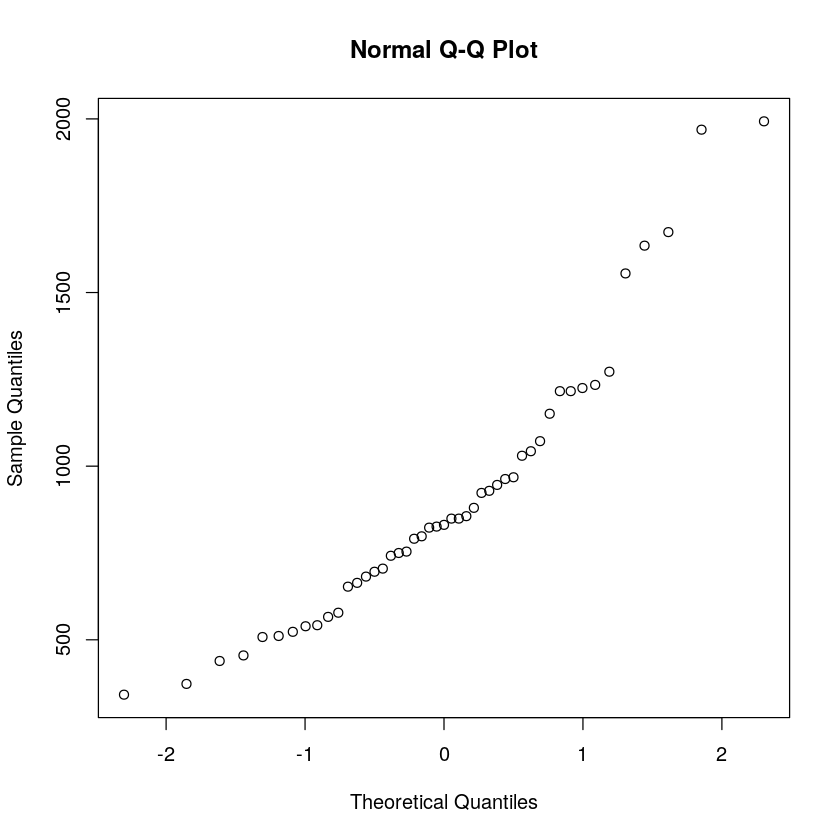

In [146]:
qqnorm(crime_df_raw$Crime)

In [147]:
# So 1038 seems a very reasonable prediction

In [ ]:
#Install packages and run first type of cross-validation

In [148]:
#install.packages('DAAG')

In [149]:
library(DAAG)

Analysis of Variance Table

Response: Crime
          Df  Sum Sq Mean Sq F value  Pr(>F)    
M          1   55084   55084    1.44 0.23748    
Ed         1  725967  725967   18.99 9.7e-05 ***
Po1        1 3173852 3173852   83.00 4.3e-11 ***
M.F        1  177521  177521    4.64 0.03759 *  
U1         1       4       4    0.00 0.99191    
U2         1  395014  395014   10.33 0.00267 ** 
Ineq       1  652440  652440   17.06 0.00019 ***
Prob       1  247978  247978    6.49 0.01505 *  
Residuals 38 1453068   38239                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




Warning message in cv.lm(data, unscaledModel_resultsOfStep2, m = 4):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”


fold 1 
Observations in test set: 11 
               2     6    12  18  24   25   26     27     28    32     39
Predicted   1430 724.3 723.1 807 850  628 1932 301.89 1197.0 785.3 797.58
cvpred      1365 713.2 753.9 660 784  642 1711 350.45 1146.5 789.1 829.57
Crime       1635 682.0 849.0 929 968  523 1993 342.00 1216.0 754.0 826.00
CV residual  270 -31.2  95.1 269 184 -119  282  -8.45   69.5 -35.1  -3.57

Sum of squares = 289265    Mean square = 26297    n = 11 

fold 2 
Observations in test set: 12 
                1   9    10   11    17   22   23   29   35     40  42   45
Predicted   730.3 686 772.7 1191 440.2  673  927 1381  745 1129.9 338  576
cvpred      816.8 706 775.9 1108 508.8  738  907 1449  775 1132.7 365  637
Crime       791.0 856 705.0 1674 539.0  439 1216 1043  653 1151.0 542  455
CV residual -25.8 150 -70.9  566  30.2 -299  309 -406 -122   18.3 177 -182

Sum of squares = 777694    Mean square = 64808    n = 12 

fold 3 
Observations in test set: 12 
               5   7

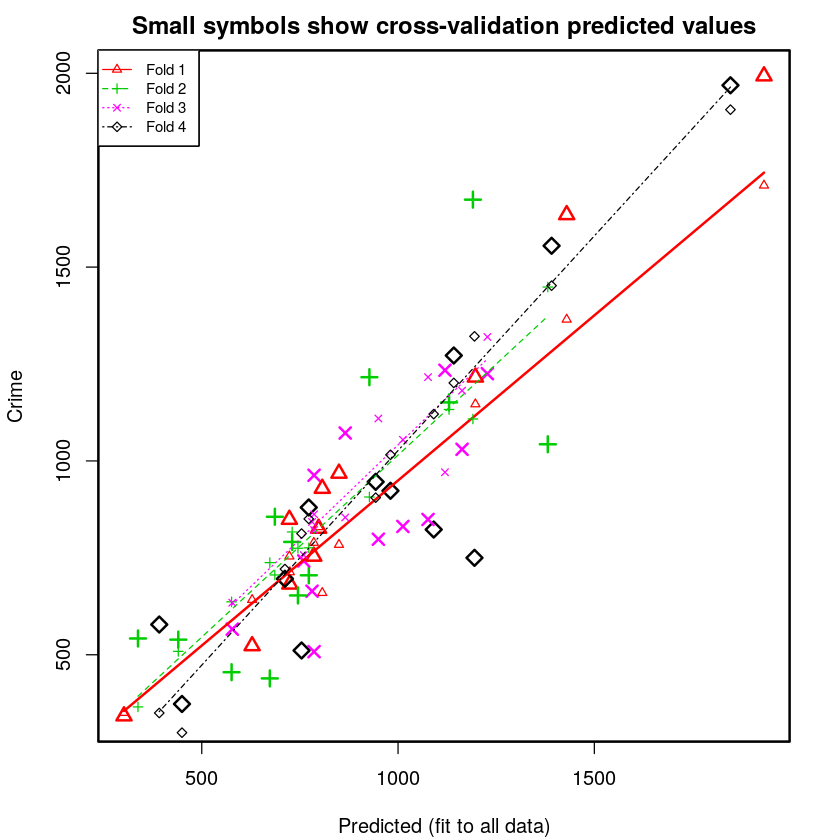

In [150]:
cross_validated_lm <- cv.lm(data, unscaledModel_resultsOfStep2, m=4)

In [ ]:
#Print attributes for analysis

In [151]:
attr(cross_validated_lm, 'ms') #ms for mean squared error, contrary to some documentation

[1] 47610

In [152]:
overall_ms <- attr(cross_validated_lm, 'ms') * nrow(data)

In [153]:
overall_ms

[1] 2237660

In [ ]:
#Remember prediction. We'll set up another type of cross-validation using caret package and performa another prediction

In [185]:
predictionForTestpoint   

1 
1038

In [ ]:
#Install caret package

In [187]:
#install.packages("caret")

In [183]:
library(caret)

Loading required package: ggplot2


In [ ]:
#Pass predictors to linear regression model and print r squared

In [184]:
set.seed(123) 
train.control <- trainControl(method = "cv", number = 4)
# Train the model
model <- train(Crime ~M + Ed + Po1 + M.F + U1 + U2 + Ineq + Prob, data = data, method = "lm",
               trControl = train.control)
# Summarize the results
print(model)

Linear Regression 

47 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (4 fold) 
Summary of sample sizes: 36, 35, 35, 35 
Resampling results:

  RMSE  Rsquared  MAE
  223   0.683     181

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
#R squared is 68 percent indicting the earlier 74% can be attributed to overfitting

In [ ]:
#Print new prediction

In [188]:
prediction2ForTestpoint <- predict(model,data_point)

In [189]:
prediction2ForTestpoint

1 
1038

In [190]:
#Original prediction for test point with overfitting

In [191]:
predictionForTestpoint   

1 
1038

In [ ]:
#Predictions were the same